In [1]:
%matplotlib inline

import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

# Задание 1
Самостоятельно выбранное изображение сделать полутоновым (перевести в формат grayscale) и построить его гистограмму.

In [14]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

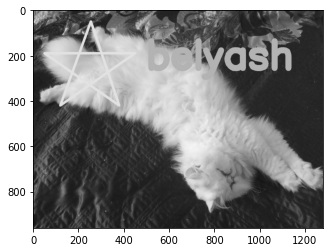

In [6]:
belyash_grey = cv2.imread('/home/qwe/Desktop/анализ изображений/playing_belyash.jpg',0)
print_img(belyash_grey)

Гистогра́мма (в фотографии) –график распределения элементов цифрового изображения с различной яркостью, в котором по оси абсцисс представлена яркость, а оси ординат – относительное число пикселей с конкретным значением яркости. Гистограмма изображения (иногда: график уровней или просто уровни) — гистограмма уровней насыщенности изображения (суммарная, или разделённая по цветовым каналам).

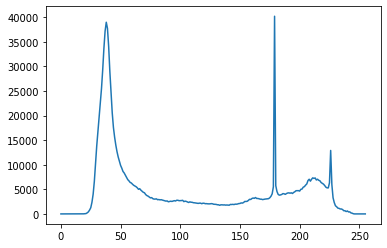

In [10]:
hist = cv2.calcHist([belyash_grey],[0],None,[256],[0,256])
plt.plot(hist)

# Задание 2
Изображение открыть в формате BRG, разделить его на визуально отличимые части, для каждой из которых путем использования маски построить гистограммы каждого цветового канала. Сравнить гистограммы, сделать выводы.

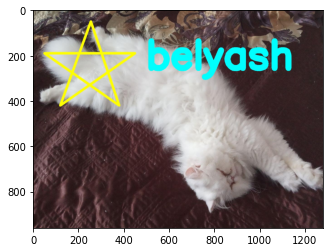

In [15]:
belyash = cv2.imread('/home/qwe/Desktop/анализ изображений/playing_belyash.jpg')
print_img(belyash)

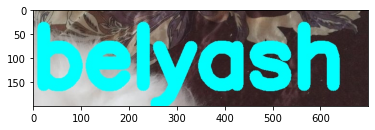

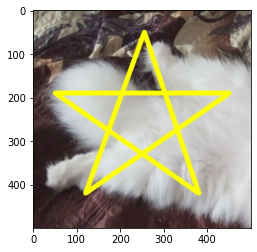

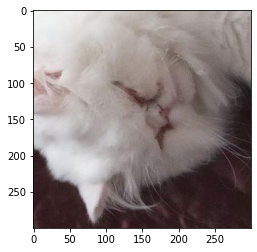

In [24]:
text = belyash[100:300,500:1200]
print_img(text)
star = belyash[0:500,0:500]
print_img(star)
belik = belyash[600:900,700:1000]
print_img(belik)

In [53]:
def hist_print(img,tl,tr,ql,qr):
    mask = np.zeros(img.shape[:2], np.uint8)
    row,col = img.shape[:2]
    mask[tl:tr, ql:qr] = 255
    masked_img = cv2.bitwise_and(img,img,mask = mask)
    # Calculate histogram with mask and without mask
    # Check third argument for mask
    
   # hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
   # hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
    
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    
    plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),'gray')
    plt.subplot(222), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB),'gray')
    plt.subplot(223), plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB),'gray')
    plt.subplot(224), 
    
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],mask,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
  #  plt.plot(hist_mask, color = 'black')
    
    plt.xlim([0,256])
    plt.show()

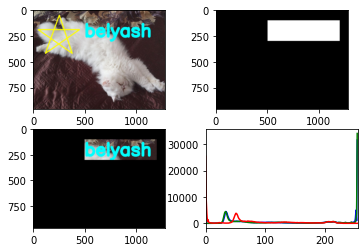

In [54]:
hist_print(belyash,100,300,500,1200)

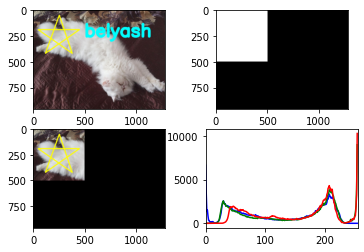

In [55]:
hist_print(belyash,0,500,0,500)

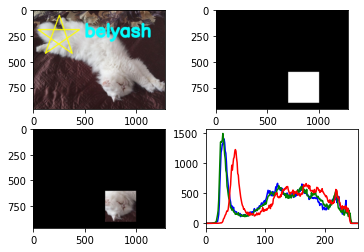

In [56]:
hist_print(belyash,600,900,700,1000)

# Задание 3
Выбрать затемненное или засвеченное изображение, применить к нему контрастирование гистограммы. 

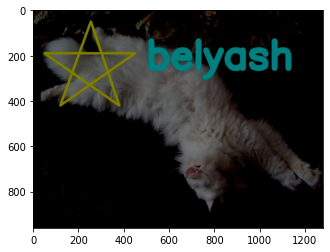

In [61]:
dark_belyash = cv2.imread('/home/qwe/Desktop/анализ изображений/dark_belyash.jpg')
print_img(dark_belyash)

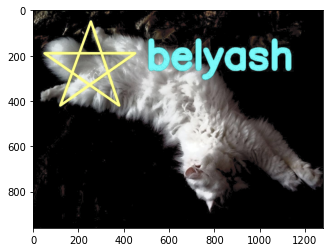

In [62]:
img_yuv = cv2.cvtColor(dark_belyash, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
print_img(img_output)

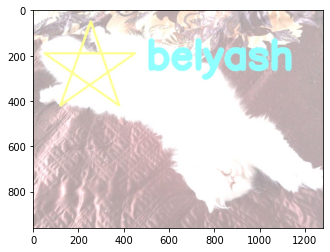

In [64]:
light_belyash = cv2.imread('/home/qwe/Desktop/анализ изображений/light_belyash.jpg')
print_img(light_belyash)

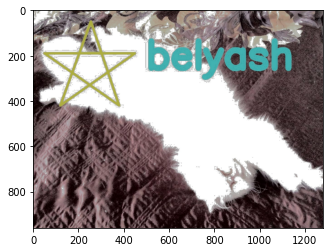

In [65]:
img_yuv = cv2.cvtColor(light_belyash, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
print_img(img_output)

# Задание 4
Произвести бинаризацию полутонового (grayscale) изображения, используя все допустимые значения параметра type метода cv2.threshold. Сравнить результаты.

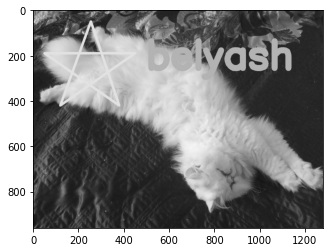

In [66]:
print_img(belyash_grey)

Image Thresholding –Простейший метод сегментации изображения. Эта нелинейная операция
Преобразует gray-scale image в binary image, в котором пиксели разделяются на выше/ниже threshold value.

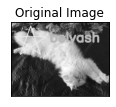

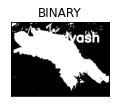

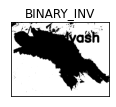

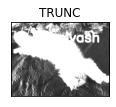

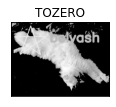

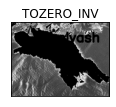

In [69]:
ret,thresh1 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [belyash_grey, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1);plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]);plt.yticks([])
    plt.show()

# Задание 5
Произвести бинаризацию полутонового (grayscale) изображения, используя как минимум пять различных комбинаций значений параметров maxValue, blockSize, thresholdType метода adaptiveThreshold. Сделать выводы.

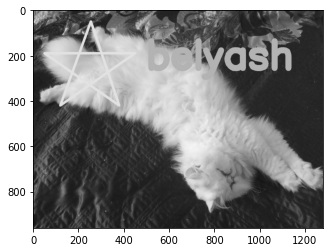

In [70]:
print_img(belyash_grey)

adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType,
blockSize, C[, dst]) # Function transforms a grayscale image to a binary image.
src – 8-bit single-channel image, dst – выходное изображение, размерам как src.
maxValue – задает значение интенсивности цвета для пикселей, которые превысили
пороговое значение,
adaptiveMethod – Adaptive thresholding algorithm to use:
• cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood
area.
• cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of
neighbourhood values where weights are a gaussian window.
thresholdType – Thresholding type (THRESH_BINARY или THRESH_BINARY_INV),
blockSize – Размер области соседних пикселей, участвующих в нахождении порогового
значения (pixel: 3, 5, 7, …),
C – константа, вычитаемая из среднего или среднего взвешенного

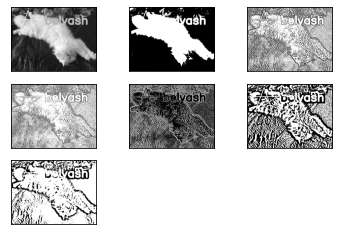

In [96]:
ret,th1 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(belyash_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(belyash_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th4 =  cv2.adaptiveThreshold(belyash_grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 11, 2)
th5 =  cv2.adaptiveThreshold(belyash_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 51, 2)
th6 =  cv2.adaptiveThreshold(belyash_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 51, 10)
#titles = ['Original Image','Global Thresholding (v = 127)','Adaptive Mean Thresholding(1)',
 #         'Adaptive Gaussian Thresholding','Adaptive Mean Thresholding(2)','Adaptive Mean Thresholding(3)']
images = [belyash_grey, th1, th2, th3,th4,th5,th6]
for i in range(7):
    plt.subplot(3,3,i+1);plt.imshow(images[i],'gray')
 #   plt.title(titles[i])
    plt.xticks([]);plt.yticks([])
plt.show()

# Задание 6
Выбрать бимодальное изображение, применить к нему фильтр Гаусса и метод бинаризации ОЦУ.

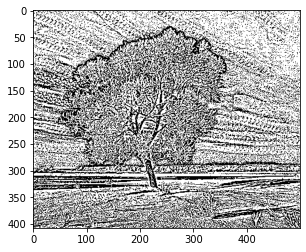

In [105]:
belyash_grey = cv2.imread('/home/qwe/Desktop/анализ изображений/tree.jpg',0)
th3 = cv2.adaptiveThreshold(belyash_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(th3,'gray')

Рассмотрим бимодальное изображение (гистограмма с двумя пиками). Для таких
изображений можно взять значение посередине между двух пиков. Естественно, для
небимодальных изображений бинаризация Оцу не будет работать корректно.

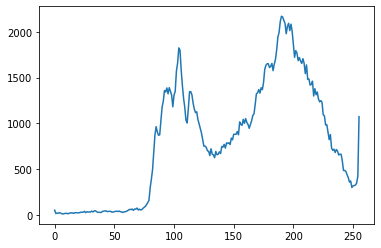

In [108]:
hist = cv2.calcHist([belyash_grey],[0],None,[256],[0,256])
plt.plot(hist)

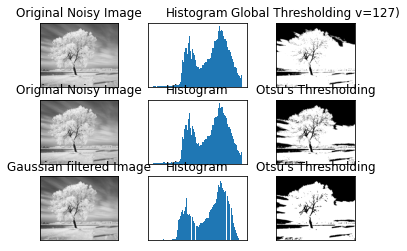

In [102]:
et1,th1 = cv2.threshold(belyash_grey, 127, 255, cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(belyash_grey, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(belyash_grey, (5,5), 0)
ret3,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
images = [belyash_grey, 0, th1, belyash_grey, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding v=127)','Original Noisy Image','Histogram',
          "Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1);plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]); plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2);plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]); plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3);plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]); plt.xticks([]), plt.yticks([])
plt.show()

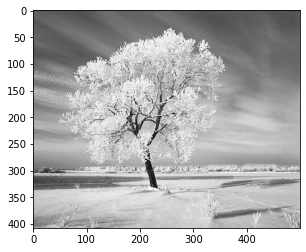

In [109]:
print_img(belyash_grey)

In [6]:
from scipy.stats import norm


In [5]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 41.6 MB 80 kB/s  eta 0:00:01    |████▏                           | 5.5 MB 301 kB/s eta 0:02:00     |████▎                           | 5.5 MB 138 kB/s eta 0:04:21     |████████████████████▋           | 26.8 MB 244 kB/s eta 0:01:01     |█████████████████████▏          | 27.5 MB 249 kB/s eta 0:00:57
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
1 - norm.cdf(150,loc = 100,scale = 30)

0.047790352272814696